**Importing libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk import sent_tokenize
from gensim.utils import simple_preprocess
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**reading csv file with specific columns**

In [2]:
data = pd.read_csv("/content/Updated_MAL.csv",usecols = ['Summary','Issue Type','Status','Assignee','Priority','Created','Major blocks','Sub-blocks'])

**reading first five records in csv file**

In [3]:
data.head()

,Summary,Major blocks,Sub-blocks,Issue Type,Status,Priority,Assignee,Created
0,LSU FV: Store cross cache misaligned with 2nd ...,Load Store Unit,NaN,Bug,Open,Medium,John Ingalls,9/27/2022 20:41
1,[TGV] Assertion Failure: ROB Retire Hang aroun...,Execution Unit,Vector ROB,Bug,In Progress,Medium,Nicolas Brunie,9/27/2022 8:07
2,[HB] LSU: investigate freeing LSIssQ early,NaN,NaN,Task,Open,Medium,Lucas Garcia,9/27/2022 7:45
3,[HB] LSU: check all issue queue replay/wakeup ...,NaN,NaN,Task,Open,Medium,Lucas Garcia,9/27/2022 7:37
4,Investigate Power differences between P650 PRF...,NaN,NaN,Task,In Progress,Medium,Julian Bailey,9/27/2022 6:19


**checking the shape of dataset**

In [4]:
data.shape

(1000, 8)

**retreiving the column names and storing in lst**

In [5]:
lst = data.columns

In [6]:
lst

Index(['Summary', 'Major blocks', 'Sub-blocks', 'Issue Type', 'Status',
       'Priority', 'Assignee', 'Created'],
      dtype='object')

**checking the number of records in different categories of Issue type column**

In [7]:
data['Issue Type'].value_counts()

Task        570
Bug         340
Epic         44
Sub-task     41
Question      5
Name: Issue Type, dtype: int64

**visualizing the number of records in Issue type**

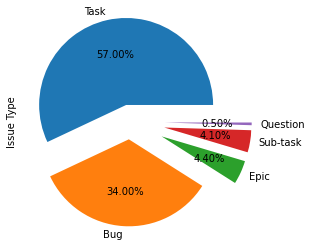

In [8]:
data['Issue Type'].value_counts().plot.pie(autopct='%1.2f%%',explode = [0.2,0.2,0.4,0.4,0.4])

There are 34% of records containing the BUG in Issue Type column


**dropping the records which are not "BUG" in issue type column**

In [9]:
i = data[(data['Issue Type'] != 'Bug')].index
data = data.drop(i,axis=0)

**now checking the number of records after dropping other than bug**

In [10]:
data.shape[0]

340

**checking the number of unique categories in target column major blocks**

In [11]:
data['Major blocks'].unique()

array(['Load Store Unit', 'Execution Unit ', 'Interrupt',
       'Instruction Fetch Unit', 'Instruction Decode and Dispatch ',
       'Scalar ROB', 'DCache', 'Next Line Predictor', 'Debug', 'ExPipe',
       'Register '], dtype=object)

**checking the number of records in different categories of major blocks**

In [12]:
data['Major blocks'].value_counts()

Execution Unit                      164
Load Store Unit                     105
Instruction Decode and Dispatch      28
Instruction Fetch Unit               19
Interrupt                             5
DCache                                5
Next Line Predictor                   4
ExPipe                                4
Register                              4
Scalar ROB                            1
Debug                                 1
Name: Major blocks, dtype: int64

**visualizing the number of records in major blocks**

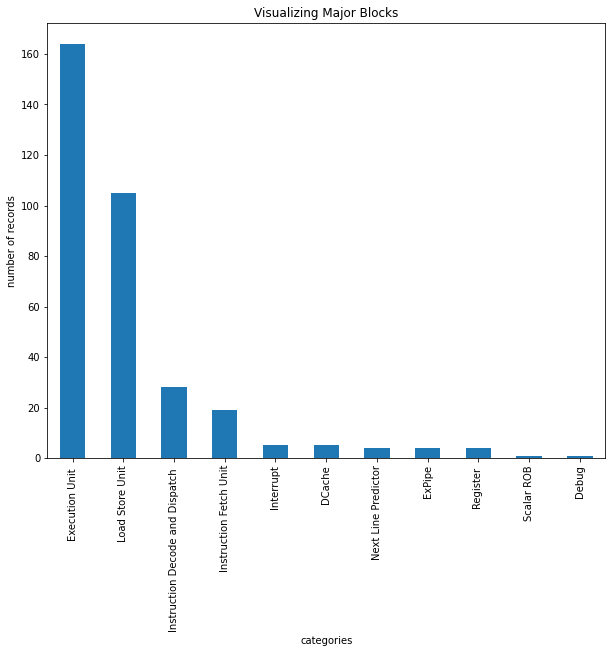

In [13]:
plt.figure(figsize=(10,8))
plt.xlabel('categories')
plt.ylabel('number of records')
plt.title('Visualizing Major Blocks')
data['Major blocks'].value_counts().plot.bar()

**checking the number of records containing the nan values**

In [14]:
data.isnull().sum()

Summary           0
Major blocks      0
Sub-blocks      227
Issue Type        0
Status            0
Priority          0
Assignee          0
Created           0
dtype: int64

In [15]:
data['Sub-blocks'].isna().sum()

227

**checking the number of records in different categories of sub blocks**

In [16]:
data['Sub-blocks'].value_counts()

Vector                                  40
Vexpipe                                 11
PRF                                      4
HWPF (Hardware Prefetch)                 4
Baler                                    3
Floating point                           3
LSTPipe                                  3
Issue Queue                              3
Scalar ROB                               3
Vector ROB                               2
RAS (Return Address Stack)               2
MSHR (Miss Status Handling Register)     2
ROB                                      2
TLB                                      2
PRF                                      2
Iss Queue                                2
Dispatch                                 2
LDPipes                                  2
Vexpipe Permute Engine                   1
Vector PRf                               1
Vector PRF                               1
LdQ (Load Queue)                         1
LDPipe                                   1
Fetch Queue

**visualizing the number of records in sub blocks**

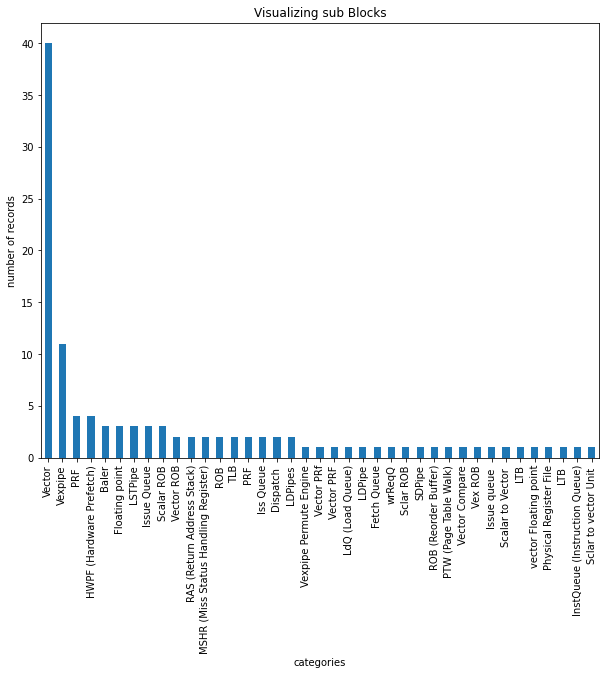

In [17]:
plt.figure(figsize=(10,8))
plt.xlabel('categories')
plt.ylabel('number of records')
plt.title('Visualizing sub Blocks')
data['Sub-blocks'].value_counts().plot.bar()

**checking the number of records in different category of Status**

In [18]:
data['Status'].value_counts()

Resolved       197
Closed         131
In Progress      7
Open             5
Name: Status, dtype: int64

**visualizing the number of records in Status**

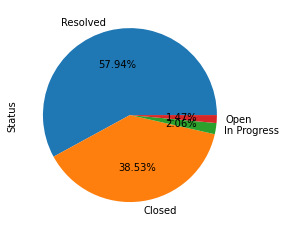

In [19]:
data['Status'].value_counts().plot.pie(autopct='%1.2f%%')

**checking the number of records in different category of Priority**

In [20]:
data['Priority'].value_counts()

Medium         304
High            13
Highest         13
Low              7
Showstopper      3
Name: Priority, dtype: int64

**visualizing the number of records in Priority**

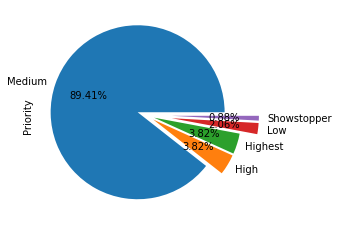

In [21]:
data['Priority'].value_counts().plot.pie(autopct='%1.2f%%',explode=[0.1,0.1,0.1,0.3,0.3])

**checking the Assignee names**

In [22]:
l = list(data['Assignee'].unique())
l

['John Ingalls',
 'Nicolas Brunie',
 'Satish Bhavanari',
 'Yohann Rabefarihy',
 'Srivatsa Yogendra',
 'Jeffrey Huang',
 'David Kravitz',
 'Andrew Hanselman',
 'Ishita Shah',
 'Kira Tsao',
 'Binayak Tiwari',
 'Brad Wu',
 'Alexandre Solomatnikov',
 'Steffen Kunze',
 'Naveen Rathore',
 'Julian Bailey',
 'Adam George',
 'Abderrahmane Sensaoui',
 'Cyril Bresch',
 'Anthony Hung',
 'Deepika S K',
 'Shaka Kao',
 'Saurabh Singh',
 'Josh Smith',
 'Lance Huang',
 'Krishnendu Patra',
 'Warren Menezes',
 'Erdinc Ozturk',
 'Khondakar Mujtaba',
 'Dave Parry',
 'Alvin Tung',
 'Rick Chen']

**checking the number of records for each Assignee**

In [23]:
data['Assignee'].value_counts()

Nicolas Brunie            82
John Ingalls              53
David Kravitz             31
Andrew Hanselman          26
Kira Tsao                 23
Josh Smith                17
Alexandre Solomatnikov    14
Adam George               14
Yohann Rabefarihy         13
Naveen Rathore            10
Binayak Tiwari             8
Brad Wu                    7
Srivatsa Yogendra          6
Saurabh Singh              6
Ishita Shah                4
Rick Chen                  4
Abderrahmane Sensaoui      3
Warren Menezes             3
Shaka Kao                  2
Deepika S K                2
Julian Bailey              1
Cyril Bresch               1
Anthony Hung               1
Jeffrey Huang              1
Steffen Kunze              1
Satish Bhavanari           1
Lance Huang                1
Krishnendu Patra           1
Erdinc Ozturk              1
Khondakar Mujtaba          1
Dave Parry                 1
Alvin Tung                 1
Name: Assignee, dtype: int64

**Visualizing the Assignee column**

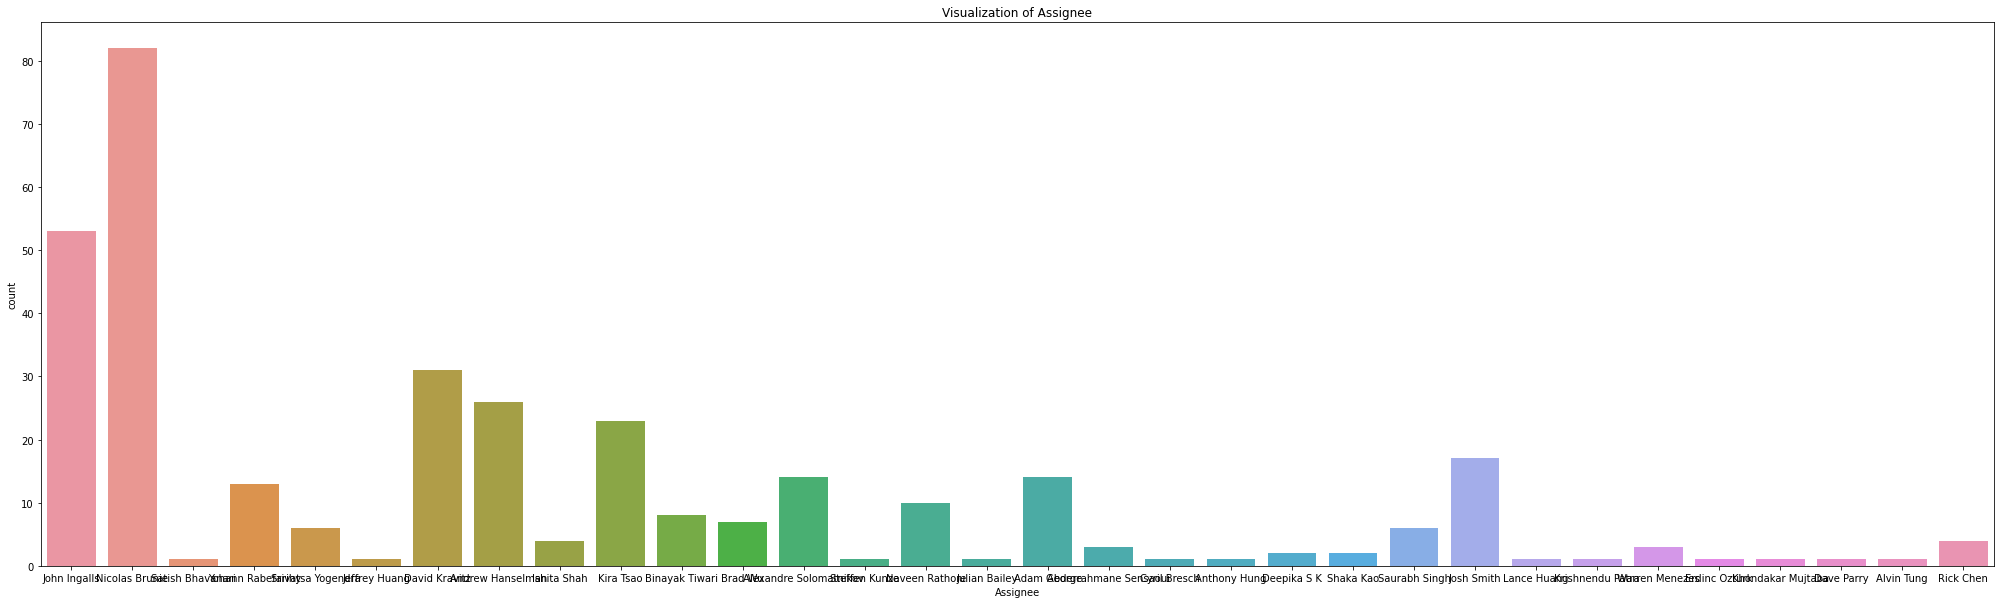

In [24]:
ind = data['Assignee'].value_counts().index
val = data['Assignee'].value_counts().values


plt.figure(figsize=(35,10))
plt.title("Visualization of Assignee")
plt.xlabel("Assignee Names")
plt.ylabel("Assignee count")

sns.countplot(x="Assignee",data=data)


**creating a dataframe of 3 columns from data**

In [25]:
df = data[['Assignee','Priority','Major blocks','Sub-blocks']]

**checking the different priority count for each Assignee**

In [26]:
df.groupby(['Assignee','Priority']).size().reset_index()

,Assignee,Priority,0
0,Abderrahmane Sensaoui,High,1
1,Abderrahmane Sensaoui,Medium,2
2,Adam George,High,1
3,Adam George,Low,2
4,Adam George,Medium,11
5,Alexandre Solomatnikov,Medium,14
6,Alvin Tung,Medium,1
7,Andrew Hanselman,High,2
8,Andrew Hanselman,Highest,6
9,Andrew Hanselman,Medium,18


**Visualizing the  differnt priority count for each Assignee**

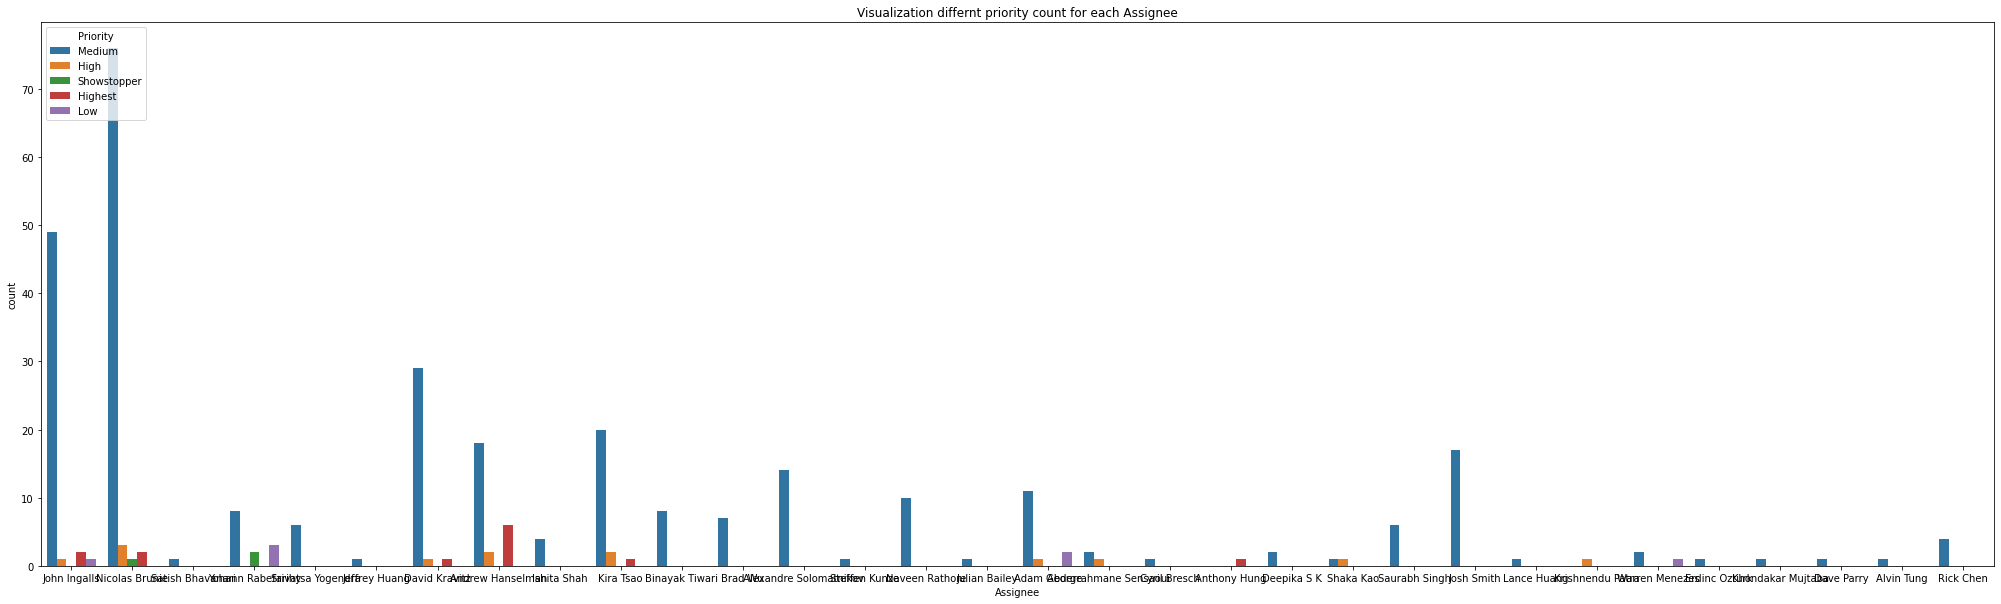

In [27]:
plt.figure(figsize=(35,10))
plt.title("Visualization differnt priority count for each Assignee")
plt.xlabel("Assignee Names")
plt.ylabel("Priority count")
sns.countplot(x="Assignee",data=data,hue='Priority')

**checking the different major blocks count for each Assignee**

In [28]:
df.groupby(['Assignee','Major blocks']).size().reset_index()

,Assignee,Major blocks,0
0,Abderrahmane Sensaoui,DCache,1
1,Abderrahmane Sensaoui,Execution Unit,1
2,Abderrahmane Sensaoui,Interrupt,1
3,Adam George,ExPipe,1
4,Adam George,Execution Unit,5
...,...,...,...
75,Srivatsa Yogendra,Register,1
76,Steffen Kunze,Load Store Unit,1
77,Warren Menezes,Load Store Unit,3
78,Yohann Rabefarihy,Execution Unit,3


**Visualizing the differnt Major blocks count for each Assignee**

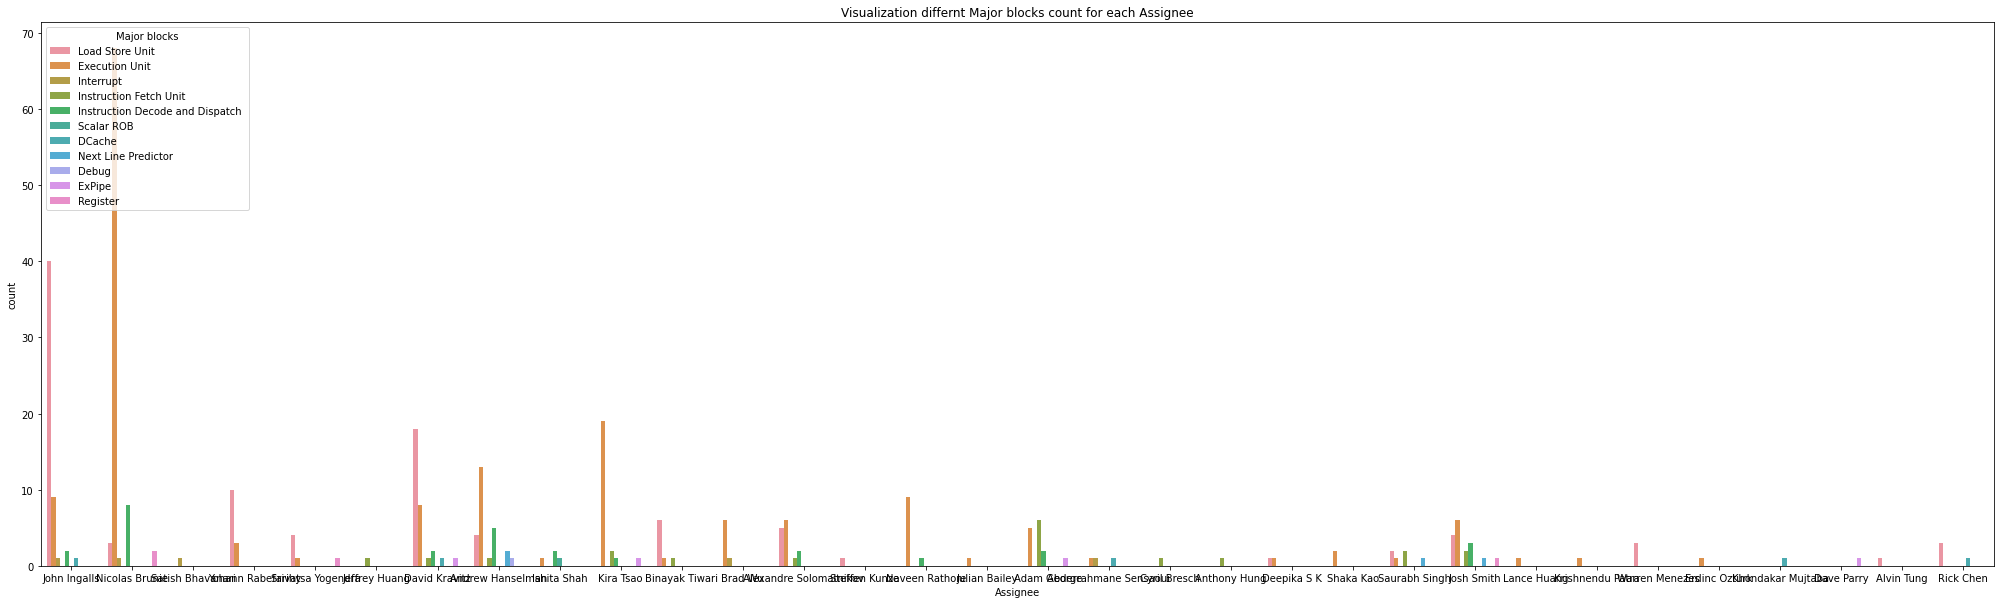

In [29]:
plt.figure(figsize=(35,10))
plt.title("Visualization differnt Major blocks count for each Assignee")
plt.xlabel("Assignee Names")
plt.ylabel("Major blocks count")
sns.countplot(x="Assignee",data=data,hue='Major blocks')

**counting the records of each Assignee based on Priority and Major Blocks**

In [30]:
df.groupby(['Assignee','Priority','Major blocks']).size().reset_index()

,Assignee,Priority,Major blocks,0
0,Abderrahmane Sensaoui,High,DCache,1
1,Abderrahmane Sensaoui,Medium,Execution Unit,1
2,Abderrahmane Sensaoui,Medium,Interrupt,1
3,Adam George,High,Instruction Decode and Dispatch,1
4,Adam George,Low,Execution Unit,2
...,...,...,...,...
98,Yohann Rabefarihy,Low,Execution Unit,1
99,Yohann Rabefarihy,Low,Load Store Unit,2
100,Yohann Rabefarihy,Medium,Execution Unit,2
101,Yohann Rabefarihy,Medium,Load Store Unit,6


**counting the records of each Assignee based on Priority,Major Blocks and sub-blocks**

In [31]:
df.groupby(['Assignee','Priority','Major blocks','Sub-blocks']).size().reset_index()

,Assignee,Priority,Major blocks,Sub-blocks,0
0,Adam George,Medium,Instruction Fetch Unit,RAS (Return Address Stack),1
1,Alexandre Solomatnikov,Medium,Execution Unit,Sclar to vector Unit,1
2,Alexandre Solomatnikov,Medium,Execution Unit,Vector,1
3,Alexandre Solomatnikov,Medium,Instruction Decode and Dispatch,PRF,1
4,Alexandre Solomatnikov,Medium,Load Store Unit,Baler,1
...,...,...,...,...,...
59,Shaka Kao,High,Execution Unit,Vector Compare,1
60,Srivatsa Yogendra,Medium,Execution Unit,Vector ROB,1
61,Srivatsa Yogendra,Medium,Load Store Unit,LTB,1
62,Warren Menezes,Medium,Load Store Unit,ROB,1


In [32]:
test_data = data[data['Sub-blocks'].isnull()]
test_data

,Summary,Major blocks,Sub-blocks,Issue Type,Status,Priority,Assignee,Created
0,LSU FV: Store cross cache misaligned with 2nd ...,Load Store Unit,NaN,Bug,Open,Medium,John Ingalls,9/27/2022 20:41
7,[TGV] Correlation: Look into vfmerge latency,Interrupt,NaN,Bug,In Progress,High,Nicolas Brunie,9/27/2022 3:05
20,[TGV]:: vsetvli instruction not retaining prev...,Execution Unit,NaN,Bug,Resolved,Medium,Nicolas Brunie,9/26/2022 6:50
24,Design considering the wrong cause code for Ma...,Interrupt,NaN,Bug,Closed,Medium,Satish Bhavanari,9/24/2022 0:06
25,Assertion in LST pipe of LSU On L2 testing of ...,Load Store Unit,NaN,Bug,Closed,Medium,John Ingalls,9/23/2022 14:33
...,...,...,...,...,...,...,...,...
990,[TGV] wrong result for `vwaddu.wv` in u8_minim...,Execution Unit,NaN,Bug,Resolved,Medium,Kira Tsao,3/14/2022 21:13
992,[TGV] In correct slide operation popping up again,Execution Unit,NaN,Bug,Resolved,Medium,Josh Smith,3/14/2022 14:35
993,VMV.x.s copying 64 bits instead of 32 bits of ...,Load Store Unit,NaN,Bug,Resolved,Medium,Josh Smith,3/14/2022 13:37
995,Assertion issue regarding check while Mallard ...,Execution Unit,NaN,Bug,Resolved,Medium,Josh Smith,3/11/2022 8:55


In [33]:
data = data.dropna()

**performing label encoding on Status, Major blocks and Priority column**

In [34]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['Status'] = label_encoder.fit_transform(data['Status'])
data['Priority'] = label_encoder.fit_transform(data['Priority'])

data['Major blocks'] = label_encoder.fit_transform(data['Major blocks'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [35]:
data['Major blocks'].unique()

array([0, 2, 3, 1])

In [36]:
data['Major blocks'].value_counts()

0    75
3    25
1     9
2     4
Name: Major blocks, dtype: int64

**defining a function to perform one hot encoding**

In [37]:
def onehot(ft,dataset):
    label = [x for x in dataset[ft].value_counts().head(10).index]
    for i in label:
        dataset[i] = np.where(dataset[ft] ==i,1,0)


**performing one hot encoding with many categories on Assignee column**

In [38]:
onehot('Assignee',data)

In [39]:
data.head()

,Summary,Major blocks,Sub-blocks,Issue Type,Status,Priority,Assignee,Created,Nicolas Brunie,John Ingalls,Kira Tsao,Andrew Hanselman,David Kravitz,Binayak Tiwari,Saurabh Singh,Alexandre Solomatnikov,Naveen Rathore,Rick Chen
1,[TGV] Assertion Failure: ROB Retire Hang aroun...,0,Vector ROB,Bug,1,2,Nicolas Brunie,9/27/2022 8:07,1,0,0,0,0,0,0,0,0,0
5,[TGV] complex vrgather deadlock when tail+mask...,0,Vector,Bug,1,2,Nicolas Brunie,9/27/2022 6:02,1,0,0,0,0,0,0,0,0,0
23,[TGV] vector divider credit underflow,0,Vector,Bug,2,2,Nicolas Brunie,9/24/2022 17:49,1,0,0,0,0,0,0,0,0,0
35,Assertion Failure: SiFive_IFUIQ_assert,2,InstQueue (Instruction Queue),Bug,0,2,Jeffrey Huang,9/22/2022 6:49,0,0,0,0,0,0,0,0,0,0
48,LSU: LDWB unroll mux multiple select,3,LDPipes,Bug,0,2,John Ingalls,9/21/2022 2:29,0,1,0,0,0,0,0,0,0,0


In [40]:
(data.columns)

Index(['Summary', 'Major blocks', 'Sub-blocks', 'Issue Type', 'Status',
       'Priority', 'Assignee', 'Created', 'Nicolas Brunie', 'John Ingalls',
       'Kira Tsao', 'Andrew Hanselman', 'David Kravitz', 'Binayak Tiwari',
       'Saurabh Singh', 'Alexandre Solomatnikov', 'Naveen Rathore',
       'Rick Chen'],
      dtype='object')

**Reading the Created column**

In [41]:
data['Created']

1       9/27/2022 8:07
5       9/27/2022 6:02
23     9/24/2022 17:49
35      9/22/2022 6:49
48      9/21/2022 2:29
            ...       
966    3/21/2022 17:36
969      3/3/2022 0:36
975    3/17/2022 11:30
986     3/16/2022 6:17
999      3/9/2022 9:21
Name: Created, Length: 113, dtype: object

**Extracting the Date and Time from created column and storing them in Date and Created_Time column**

In [42]:
data['Date'] = pd.to_datetime(data['Created']).dt.date
data['Creatd_Time'] = pd.to_datetime(data['Created']).dt.time

In [43]:
data['Date']

1      2022-09-27
5      2022-09-27
23     2022-09-24
35     2022-09-22
48     2022-09-21
          ...    
966    2022-03-21
969    2022-03-03
975    2022-03-17
986    2022-03-16
999    2022-03-09
Name: Date, Length: 113, dtype: object

In [44]:
from datetime import datetime as dt

In [45]:
data['Creatd_Time']

1      08:07:00
5      06:02:00
23     17:49:00
35     06:49:00
48     02:29:00
         ...   
966    17:36:00
969    00:36:00
975    11:30:00
986    06:17:00
999    09:21:00
Name: Creatd_Time, Length: 113, dtype: object

In [46]:
for i in data['Creatd_Time'].values:
    print(i)

08:07:00
06:02:00
17:49:00
06:49:00
02:29:00
20:55:00
17:33:00
12:18:00
07:50:00
02:39:00
00:08:00
12:09:00
07:26:00
02:52:00
01:58:00
18:27:00
02:33:00
22:40:00
12:14:00
05:16:00
16:51:00
06:35:00
01:35:00
21:51:00
09:00:00
05:59:00
02:35:00
06:18:00
05:41:00
02:13:00
12:41:00
03:22:00
06:31:00
23:35:00
20:03:00
07:45:00
06:03:00
23:22:00
08:02:00
06:50:00
23:22:00
22:48:00
03:31:00
05:54:00
03:20:00
11:18:00
06:02:00
04:46:00
00:51:00
22:59:00
14:47:00
12:04:00
12:10:00
11:19:00
04:07:00
15:36:00
14:42:00
13:56:00
09:03:00
10:53:00
09:49:00
11:43:00
06:49:00
06:06:00
23:40:00
06:24:00
16:22:00
15:55:00
22:11:00
07:31:00
15:38:00
06:21:00
00:24:00
16:33:00
16:03:00
15:02:00
16:28:00
14:36:00
23:22:00
22:44:00
13:06:00
08:24:00
05:11:00
07:18:00
14:26:00
05:21:00
00:38:00
13:11:00
11:16:00
15:48:00
10:33:00
19:01:00
00:34:00
06:19:00
07:41:00
06:36:00
08:27:00
06:53:00
15:24:00
14:56:00
17:11:00
15:53:00
05:53:00
00:04:00
15:50:00
15:11:00
15:16:00
08:16:00
17:36:00
00:36:00
11:30:00
0

In [47]:
for i in data['Creatd_Time'].values:
    j=(dt.strptime(str(i), "%H:%M:%S") > dt.strptime("12:45:00", "%H:%M:%S"))
    print(j)
    break

False


In [48]:
ind1 = data['Date'].values
print(ind1)

[datetime.date(2022, 9, 27) datetime.date(2022, 9, 27)
 datetime.date(2022, 9, 24) datetime.date(2022, 9, 22)
 datetime.date(2022, 9, 21) datetime.date(2022, 9, 20)
 datetime.date(2022, 9, 20) datetime.date(2022, 9, 20)
 datetime.date(2022, 9, 20) datetime.date(2022, 9, 20)
 datetime.date(2022, 9, 20) datetime.date(2022, 9, 19)
 datetime.date(2022, 9, 19) datetime.date(2022, 9, 19)
 datetime.date(2022, 9, 19) datetime.date(2022, 9, 17)
 datetime.date(2022, 9, 14) datetime.date(2022, 9, 13)
 datetime.date(2022, 9, 12) datetime.date(2022, 9, 9)
 datetime.date(2022, 9, 7) datetime.date(2022, 9, 7)
 datetime.date(2022, 9, 7) datetime.date(2022, 9, 6)
 datetime.date(2022, 9, 6) datetime.date(2022, 9, 6)
 datetime.date(2022, 9, 6) datetime.date(2022, 9, 5)
 datetime.date(2022, 9, 2) datetime.date(2022, 9, 2)
 datetime.date(2022, 9, 1) datetime.date(2022, 9, 1)
 datetime.date(2022, 8, 30) datetime.date(2022, 8, 29)
 datetime.date(2022, 8, 28) datetime.date(2022, 8, 25)
 datetime.date(2022, 8,

**Extraacting the Day and Month from Date column**

In [49]:
data["created_day"] = pd.to_datetime(data.Date, format="%Y-%m-%d").dt.day
data["created_month"] = pd.to_datetime(data.Date, format="%Y-%m-%d").dt.month

**Dropping some columns**

In [50]:
data = data.drop(['Date','Created','Issue Type','Assignee'],axis=1)

In [51]:
data

,Summary,Major blocks,Sub-blocks,Status,Priority,Nicolas Brunie,John Ingalls,Kira Tsao,Andrew Hanselman,David Kravitz,Binayak Tiwari,Saurabh Singh,Alexandre Solomatnikov,Naveen Rathore,Rick Chen,Creatd_Time,created_day,created_month
1,[TGV] Assertion Failure: ROB Retire Hang aroun...,0,Vector ROB,1,2,1,0,0,0,0,0,0,0,0,0,08:07:00,27,9
5,[TGV] complex vrgather deadlock when tail+mask...,0,Vector,1,2,1,0,0,0,0,0,0,0,0,0,06:02:00,27,9
23,[TGV] vector divider credit underflow,0,Vector,2,2,1,0,0,0,0,0,0,0,0,0,17:49:00,24,9
35,Assertion Failure: SiFive_IFUIQ_assert,2,InstQueue (Instruction Queue),0,2,0,0,0,0,0,0,0,0,0,0,06:49:00,22,9
48,LSU: LDWB unroll mux multiple select,3,LDPipes,0,2,0,1,0,0,0,0,0,0,0,0,02:29:00,21,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,[TGV] vfrdiv.vf failing tgv test for LMUL 4 and 8,0,Vector,2,2,1,0,0,0,0,0,0,0,0,0,17:36:00,21,3
969,[TGV] Assertion failure ROB Retire Hang,1,Sclar ROB,2,2,1,0,0,0,0,0,0,0,0,0,00:36:00,3,3
975,[TGV] s2v ops with vl=0 or vl<vstart must not ...,0,Sclar to vector Unit,0,2,0,0,0,0,0,0,0,1,0,0,11:30:00,17,3
986,[TGV] Assertion Failure: SiFive_VexPipe_assert...,0,Vexpipe,2,2,1,0,0,0,0,0,0,0,0,0,06:17:00,16,3


**Preprocessing the Summary Column**

In [52]:
import re
data['Summary'] = data['Summary'].apply(lambda x : re.sub('[^a-zA-Z0-9]',' ',x))

**Lemmatizing the records in Summary and storing them in corpus**

In [53]:
lemmatizer=WordNetLemmatizer()

corpus = []
index = list(data.index)
i=0
for j in range(0,len(data.Summary)):
    title = data.Summary[index[i]]
    title = title.lower()
    title = title.split()
    title = [lemmatizer.lemmatize(word) for word in title if not word in stopwords.words('english')]
    title = ' '.join(title)
    corpus.append(title)
    i=i+1

**Creating the TFIDF model to convert summary to vectors**

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(corpus).toarray()
fn = tv.get_feature_names_out()

**Assigning Vectors to summary**

In [55]:
data.Summary = X

In [56]:
from sklearn.preprocessing import StandardScaler

**Assigning features to x and target column to y for training the model**

In [57]:
x = data.drop(['Creatd_Time','Sub-blocks'],axis=1)
y = data['Sub-blocks']

**Applying the standardization on x**

In [58]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [59]:
data.isnull().sum()

Summary                   0
Major blocks              0
Sub-blocks                0
Status                    0
Priority                  0
Nicolas Brunie            0
John Ingalls              0
Kira Tsao                 0
Andrew Hanselman          0
David Kravitz             0
Binayak Tiwari            0
Saurabh Singh             0
Alexandre Solomatnikov    0
Naveen Rathore            0
Rick Chen                 0
Creatd_Time               0
created_day               0
created_month             0
dtype: int64

In [60]:
data

,Summary,Major blocks,Sub-blocks,Status,Priority,Nicolas Brunie,John Ingalls,Kira Tsao,Andrew Hanselman,David Kravitz,Binayak Tiwari,Saurabh Singh,Alexandre Solomatnikov,Naveen Rathore,Rick Chen,Creatd_Time,created_day,created_month
1,0.0,0,Vector ROB,1,2,1,0,0,0,0,0,0,0,0,0,08:07:00,27,9
5,0.0,0,Vector,1,2,1,0,0,0,0,0,0,0,0,0,06:02:00,27,9
23,0.0,0,Vector,2,2,1,0,0,0,0,0,0,0,0,0,17:49:00,24,9
35,0.0,2,InstQueue (Instruction Queue),0,2,0,0,0,0,0,0,0,0,0,0,06:49:00,22,9
48,0.0,3,LDPipes,0,2,0,1,0,0,0,0,0,0,0,0,02:29:00,21,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,0.0,0,Vector,2,2,1,0,0,0,0,0,0,0,0,0,17:36:00,21,3
969,0.0,1,Sclar ROB,2,2,1,0,0,0,0,0,0,0,0,0,00:36:00,3,3
975,0.0,0,Sclar to vector Unit,0,2,0,0,0,0,0,0,0,1,0,0,11:30:00,17,3
986,0.0,0,Vexpipe,2,2,1,0,0,0,0,0,0,0,0,0,06:17:00,16,3


**Importing ML models and metrics**

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [62]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)
RF = RandomForestClassifier()
classify_rf = RF.fit(X_train, y_train)

#prediction
y_predRF=classify_rf.predict(X_test)

#Evaluation metrics
print(confusion_matrix(y_test, y_predRF))
print(classification_report(y_test, y_predRF))
print(accuracy_score(y_test, y_predRF))

RF_score = accuracy_score(y_test, y_predRF)

[[0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]]
                          precision    recall  f1-score   support

                   Baler       0.00      0.00      0.00         1
               Dispatch        0.00      0.00      0.00         0
          Floating point       0.00      0.00      0.00         1
HWPF (Hardware Prefetch)       1.00      1.00      1.00         1
               Iss Queue       0.00      0.00      0.00         1
                 LDPipes       0.00      0.00      0.00         0
                 LSTPipe       0.00      0.00      0.00         1
                    PRF        0.00      0.00      0.00         0
   PTW (Page Table Walk)   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [63]:
import itertools

def plot_confusion_matrix(cm, classes=list(data['Sub-blocks'].unique()), title="",
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix ' +title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

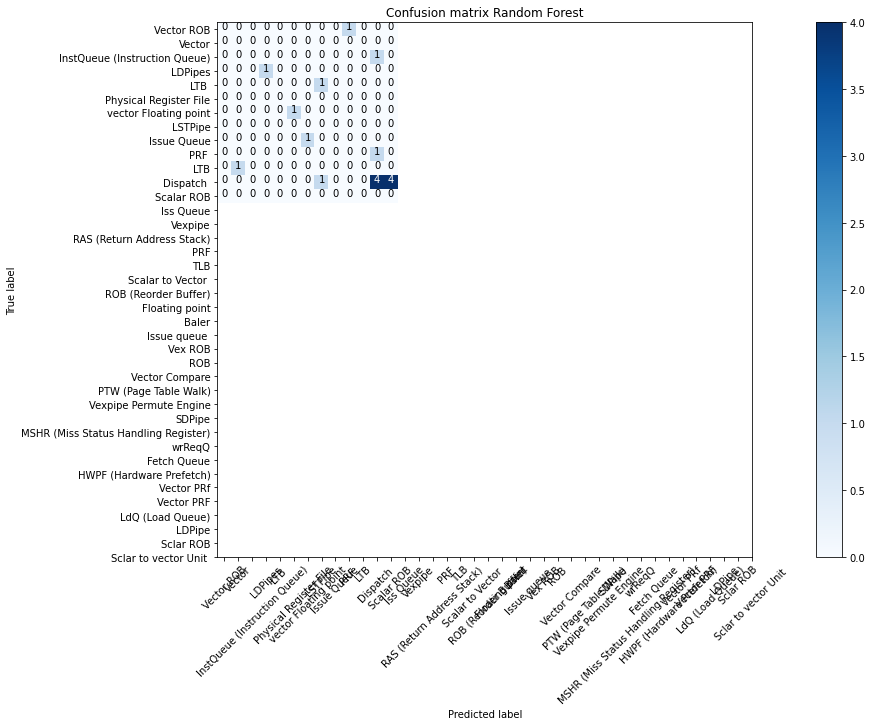

In [64]:
plt.figure(figsize=(18,10))
plot_confusion_matrix(confusion_matrix(y_test, y_predRF), title = 'Random Forest')

The above trained model does not performed well because the dataset is imbalanced i.e, target column does not have enough records for each category

**Applying  Random Over Sampler**

In [65]:
from imblearn.over_sampling import RandomOverSampler

ROS = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ROS.fit_resample(X_train, y_train)
classify_ROS = RF.fit(X_res, y_res)

#prediction
y_predrfROS=classify_ROS.predict(X_test)

#Evaluation metrics
print(confusion_matrix(y_test, y_predrfROS))
print(classification_report(y_test, y_predrfROS))
print(accuracy_score(y_test, y_predrfROS))

ROS_score = accuracy_score(y_test, y_predrfROS)

[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 2 1 1 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
                          precision    recall  f1-score   support

                   Baler       0.00      0.00      0.00         1
          Floating point       0.00      0.00      0.00         1
HWPF (Hardware Prefetch)       1.00      1.00      1.00         1
               Iss Queue       0.00      0.00      0.00         1
                 LDPipes       0.00      0.00      0.00         0
                 LSTPipe       0.00      0.00      0.00         1
                    PRF        0.00      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

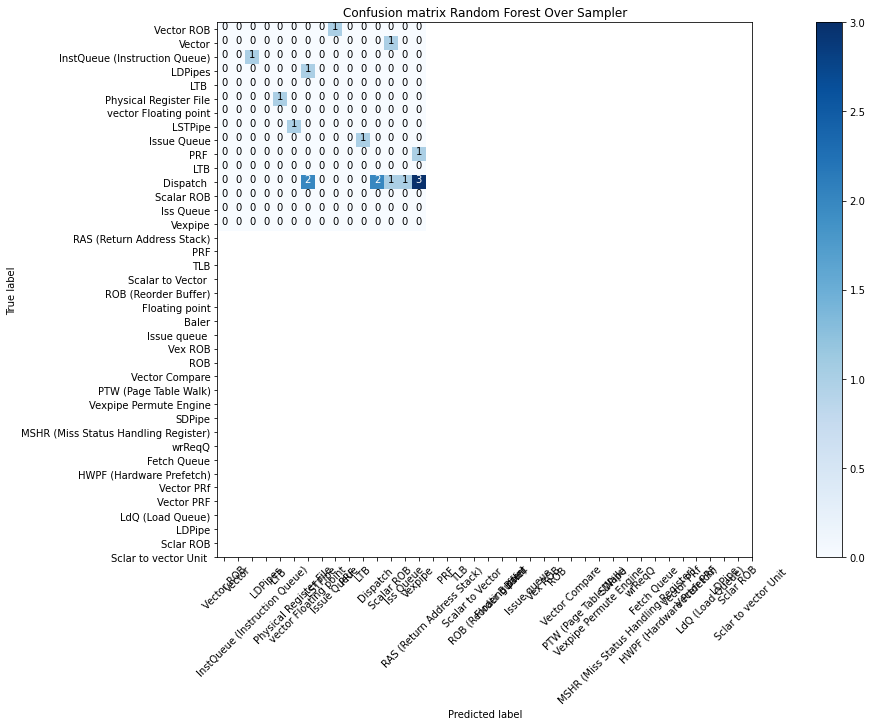

In [66]:
plt.figure(figsize=(18,10))
plot_confusion_matrix(confusion_matrix(y_test, y_predrfROS), title = 'Random Forest Over Sampler')

In [67]:
value_counts = data['Sub-blocks'].value_counts()

#Select the values where the count is less than 3
to_remove = value_counts[value_counts <= 2].index

# Keep rows where the Sub-blocks column is not in to_remove
data = data[~data['Sub-blocks'].isin(to_remove)]


In [68]:
data['Sub-blocks'].value_counts()

Vector                      40
Vexpipe                     11
PRF                          4
HWPF (Hardware Prefetch)     4
LSTPipe                      3
Issue Queue                  3
Scalar ROB                   3
Floating point               3
Baler                        3
Name: Sub-blocks, dtype: int64

In [69]:
data

,Summary,Major blocks,Sub-blocks,Status,Priority,Nicolas Brunie,John Ingalls,Kira Tsao,Andrew Hanselman,David Kravitz,Binayak Tiwari,Saurabh Singh,Alexandre Solomatnikov,Naveen Rathore,Rick Chen,Creatd_Time,created_day,created_month
5,0.0,0,Vector,1,2,1,0,0,0,0,0,0,0,0,0,06:02:00,27,9
23,0.0,0,Vector,2,2,1,0,0,0,0,0,0,0,0,0,17:49:00,24,9
56,0.0,0,Vector,2,2,1,0,0,0,0,0,0,0,0,0,12:18:00,20,9
62,0.0,3,LSTPipe,0,2,0,1,0,0,0,0,0,0,0,0,00:08:00,20,9
68,0.0,0,Issue Queue,0,2,1,0,0,0,0,0,0,0,0,0,12:09:00,19,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,0,Vector,2,2,1,0,0,0,0,0,0,0,0,0,15:50:00,30,3
953,0.0,0,Vexpipe,2,2,1,0,0,0,0,0,0,0,0,0,15:16:00,24,3
966,0.0,0,Vector,2,2,1,0,0,0,0,0,0,0,0,0,17:36:00,21,3
986,0.0,0,Vexpipe,2,2,1,0,0,0,0,0,0,0,0,0,06:17:00,16,3


**Apply SMOTE technique**

In [70]:
x = data.drop(['Creatd_Time','Sub-blocks'],axis=1)
y = data['Sub-blocks']

sc = StandardScaler()
x = sc.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42,k_neighbors=1)
X_res, y_res = sm.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.15, random_state = 0)
RFS = RandomForestClassifier()
classify_RFS = RFS.fit(X_train, y_train)

#prediction
y_predrRFS=classify_RFS.predict(X_test)

#Evaluation metrics
print(confusion_matrix(y_test, y_predrRFS))
print(classification_report(y_test, y_predrRFS))
print(accuracy_score(y_test, y_predrRFS))

RFS_score = accuracy_score(y_test, y_predrRFS)

[[6 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0]
 [0 0 0 2 0 5 0 0 0]
 [0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 1 3]]
                          precision    recall  f1-score   support

                   Baler       1.00      1.00      1.00         6
          Floating point       1.00      1.00      1.00         3
HWPF (Hardware Prefetch)       1.00      1.00      1.00         5
             Issue Queue       0.60      1.00      0.75         3
                 LSTPipe       1.00      1.00      1.00         7
                    PRF        1.00      0.71      0.83         7
              Scalar ROB       1.00      1.00      1.00         8
                  Vector       0.67      1.00      0.80         2
                 Vexpipe       1.00      0.75      0.86         4

                accuracy                           0.93        45
               macro avg       0.92      0.94      0.92        45
            weig

In [71]:
import itertools

def plot_confusion_matrix1(cm, classes=list(data['Sub-blocks'].unique()), title="",
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix ' +title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

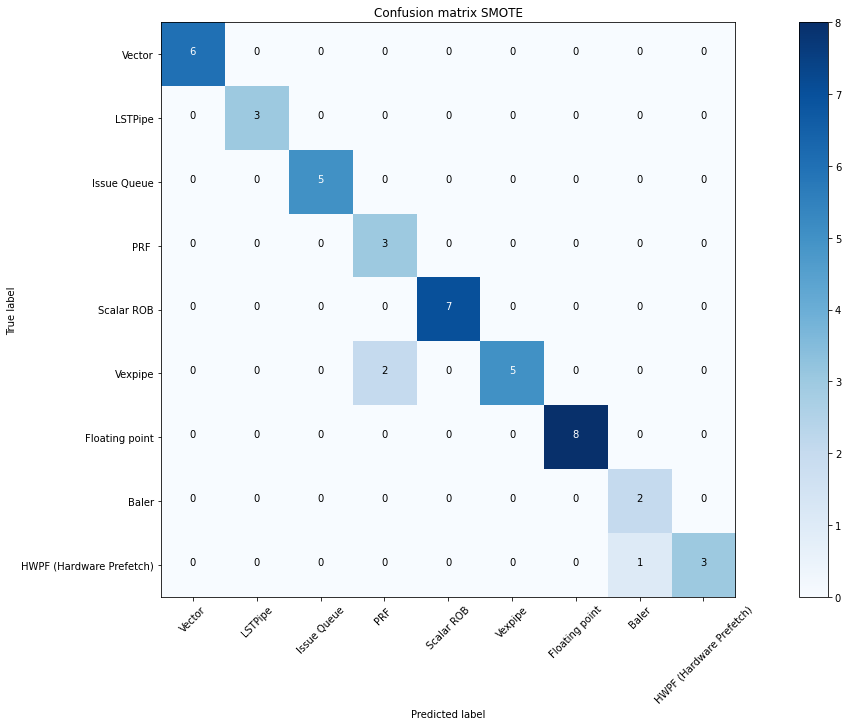

In [72]:
plt.figure(figsize=(18,10))
plot_confusion_matrix1(confusion_matrix(y_test, y_predrRFS), title = 'SMOTE')

**Hyperparameter Tuning**

In [73]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [74]:
rf_random = RandomizedSearchCV(estimator = RFS, param_distributions = random_grid, n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

**Best parametrs**

In [75]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [76]:
#prediction
y_predrRFH=rf_random.predict(X_test)

#Evaluation metrics
print(confusion_matrix(y_test, y_predrRFH))
print(classification_report(y_test, y_predrRFH))
print(accuracy_score(y_test, y_predrRFH))

RFH_score = accuracy_score(y_test, y_predrRFH)

[[6 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0]
 [0 0 0 2 0 5 0 0 0]
 [0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 2 2]]
                          precision    recall  f1-score   support

                   Baler       1.00      1.00      1.00         6
          Floating point       1.00      1.00      1.00         3
HWPF (Hardware Prefetch)       1.00      1.00      1.00         5
             Issue Queue       0.60      1.00      0.75         3
                 LSTPipe       1.00      1.00      1.00         7
                    PRF        1.00      0.71      0.83         7
              Scalar ROB       1.00      1.00      1.00         8
                  Vector       0.50      1.00      0.67         2
                 Vexpipe       1.00      0.50      0.67         4

                accuracy                           0.91        45
               macro avg       0.90      0.91      0.88        45
            weig

**Save the model to reuse it again**

In [77]:
import pickle
# open a file, where you ant to store the data
file1 = open('RFS_SUB.pkl','wb')
file2 = open('RFH_SUB.pkl','wb')

# dump information to that file
pickle.dump(RFS,file1)
pickle.dump(rf_random,file2)


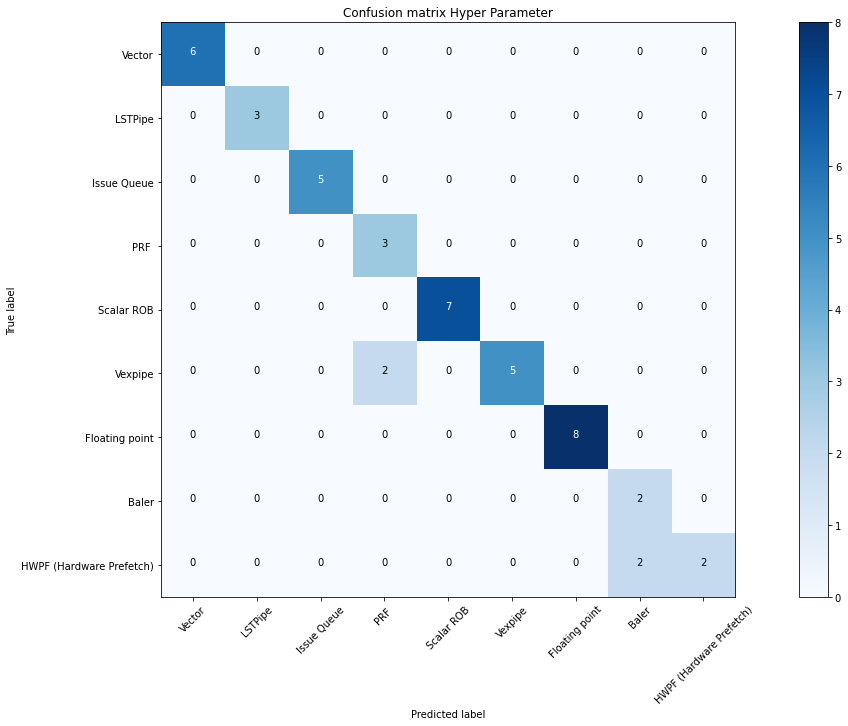

In [78]:
plt.figure(figsize=(18,10))
plot_confusion_matrix1(confusion_matrix(y_test, y_predrRFH), title = 'Hyper Parameter')

<BarContainer object of 4 artists>

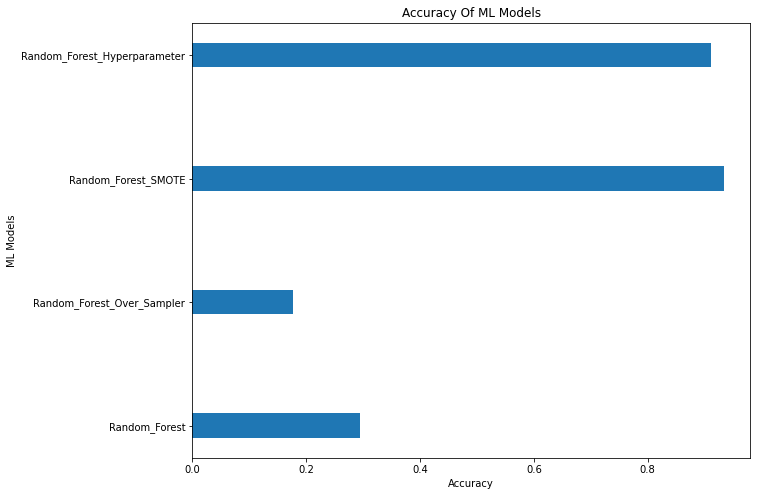

In [79]:
x = ['Random_Forest','Random_Forest_Over_Sampler','Random_Forest_SMOTE','Random_Forest_Hyperparameter']
y = []
y.append(RF_score)
y.append(ROS_score)
y.append(RFS_score)
y.append(RFH_score)

plt.figure(figsize=(10,8))
plt.title("Accuracy Of ML Models")
plt.xlabel("Accuracy")
plt.ylabel("ML Models")
plt.barh(x,y,height=0.2)


In [80]:
test_data.to_csv("sub_test.csv")